# Simulation grid creation
Valentin Dall'Alba / January 2020

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

exec(open('./functions/gis_read_function.py').read())
exec(open('./functions/grid_creation_function.py').read())

In [8]:
pathASCII = './data/ascii/'
pathGSLIB = './data/gslib/'

### 1 : Ascii to gslib
We start by reading the asccii files and transform then to gslib file.  
The ascii file are the bottom and top topography of the PC.  
The output of the function _txtToGslib_GIS_ is a Geone Img object.  

In [44]:
altMur_rgf  = txtToGslib_GIS(pathASCII+'alt_mur_PC_RGF93.txt',pathGSLIB+'alt_mur_PC_RGF93.gslib')
altToit_rgf = txtToGslib_GIS(pathASCII+'alt_toit_PC_RGF93.txt',pathGSLIB+'alt_toit_PC_RGF93.gslib')

*** txt to Gslib Done***
*** txt to Gslib Done***


We can plot the two topography maps and the thickness maps of the PC layer :

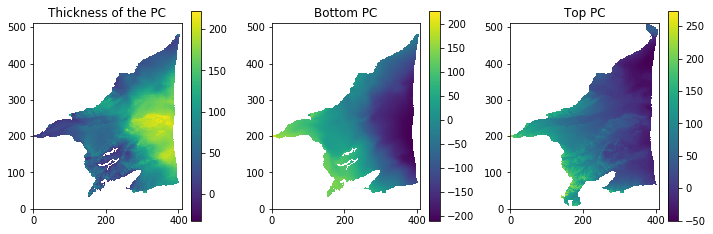

In [37]:
diff = altToit_rgf.val - altMur_rgf.val

plt.subplots(1,3,figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(diff[0,0], cmap='viridis', origin='lower')
plt.title('Thickness of the PC')
plt.colorbar(shrink=0.3)
plt.tight_layout()

plt.subplot(1,3,2)
plt.imshow(altMur_rgf.val[0,0], cmap='viridis', origin='lower')
plt.title('Bottom PC')
plt.colorbar(shrink=0.3)
plt.tight_layout()

plt.subplot(1,3,3)
plt.imshow(altToit_rgf.val[0,0], cmap='viridis', origin='lower')
plt.title('Top PC')
plt.colorbar(shrink=0.3)
plt.tight_layout()

### 2 : Compute the simulation grid from bottom and top altitude
The function _create3DGrid_ takes two topographies and a storage path as inputs data.    
The outputs of the function are 2 Geone Img objects (the 3D grid is not store on gitHub) :   
* The first one has two variables, the PC Grid in real altitute and the PC transformed grid in regard of the bottom topography.
* The second one corresponds to the value of the shift on each cells (usefulls to transform the hard data in the new grid for example).

In [36]:
grid3D_RGF, grid3D_info_RGF = create3DGrid(altToit_rgf, altMur_rgf, pathGSLIB)

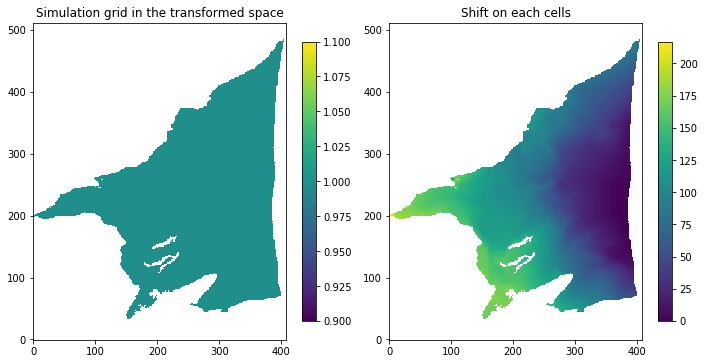

In [43]:
plt.subplots(1,2,figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(grid3D_RGF.val[1,0], cmap='viridis', origin='lower')
plt.title('Simulation grid in the transformed space')
plt.colorbar(shrink=0.4)
plt.tight_layout()

plt.subplot(1,2,2)
plt.imshow(grid3D_info_RGF.val[0,0], cmap='viridis', origin='lower')
plt.title('Shift on each cells')
plt.colorbar(shrink=0.4)
plt.tight_layout()
